# En el presente script veremos como cargar un archivo que contiene el modelo entrenado y otros parámetros, para poder usarlos y hacer predicciones

In [12]:
# importamos paquetes de graficación:
import matplotlib.pyplot as plt

# Importamos el dataset "make_blobs" que genera un conjunto de "manchas" 
from sklearn.datasets import make_blobs

# Importamos función para usar el modelo entrenado
import joblib

In [13]:
# Generamos los datos con el generador de datos 'make blobs':

K_features=10#<--- numero de centroides 'k' del K-means para generar los datos

n=1000 # <--- numero de datos

features, labels = make_blobs(n_samples=n, centers=K_features, random_state=42)

In [14]:
# Verificamos el tipo de datos de cada componente:
print('Los "features" son de tipo: ',type(features))

print('Las "labels" son de tipo: ',type(labels))

# Dimensiones de cada componete:
print('\nLos "features" son un array de tamaño: ', features.shape)

print('Las "labels" son un array de tamaño: ', labels.shape)

Los "features" son de tipo:  <class 'numpy.ndarray'>
Las "labels" son de tipo:  <class 'numpy.ndarray'>

Los "features" son un array de tamaño:  (1000, 2)
Las "labels" son un array de tamaño:  (1000,)


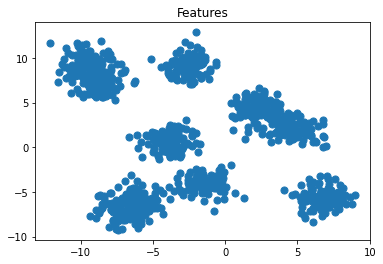

In [15]:
# Graficamos un diagrama de dispersión de los datos:
plt.figure()
plt.scatter(features[:,0], features[:,1], s=50) #<--- 's' indica el grosor de los puntos
plt.title('Features')
plt.show()

# Cargamos el modelo entrenado y lo usamos:

In [16]:
# Cargamos el archivo 'files_K_means.pkl'
Files = joblib.load('files_K_means.pkl')

#clf_kmeans = joblib.load('modelo_entrenado_K_means_0.pkl')

In [17]:
# Recordemos que el archivo 'files.pkl' contiene 2 archivos, 
# el primero es modelo entrenado 'clf_kmeans' y el segundo es una matriz de 4x3
Files

[KMeans(n_clusters=10),
 array([[2, 4, 6],
        [6, 4, 2],
        [0, 9, 8],
        [8, 9, 0]])]

In [18]:
print('Modelo entrenado = \n',Files[0]) # <-- Accesamos al modelo entrenado
print('\nMatriz de 4x3 = \n',Files[1]) # <-- Accesamos a la matriz de 4x3

Modelo entrenado = 
 KMeans(n_clusters=10)

Matriz de 4x3 = 
 [[2 4 6]
 [6 4 2]
 [0 9 8]
 [8 9 0]]


In [19]:
clf_kmeans = Files[0] #<-- Modelo entrenado


In [20]:
# Una vez que hemos cargado el clasificador,
# lo aplicamos a los datos de prueba para generar etiquetas predichas:
labels_predict = clf_kmeans.predict(features)
#print(labels_predict)

In [21]:
# Después del entrenamiento, obtenemos los puntos de los centroides de los 'K' clusters:
centers = clf_kmeans.cluster_centers_
print(centers)

[[-3.87930094  0.62649577]
 [-9.55339835  9.74275842]
 [ 6.66698063 -5.68755849]
 [-2.60246927  9.12900725]
 [-5.91246413 -5.77106689]
 [ 4.7533443   1.9635735 ]
 [ 2.12848782  4.33920242]
 [-1.38096897 -4.1355047 ]
 [-8.87068287  7.30037042]
 [-7.13806959 -7.34095392]]


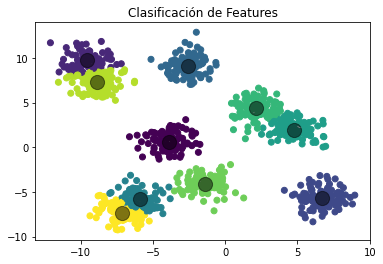

In [22]:
# graficamos datos y un color 'c' correspondiente a su etiqueta
plt.scatter(features[:,0], features[:,1], c=labels_predict)

# graficamos centros de cada cluster:
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

plt.title('Clasificación de Features')
plt.show()